# Project 7 - Machine Learning: California Housing Analysis

**Author:** Elen Tesfai  
**GitHub Repository:** [Elen's GitHub Link](https://github.com/Elen-tesfai/datafun-07-ml)  
**GitHub URL:** https://github.com/Elen-tesfai/datafun-07-ml


## Part 5 - Bonus
In this section, we will analyze the California Housing Dataset to practice machine learning skills.

## 1. Loading and Previewing the Dataset

In this section, we will load the California Housing Dataset and preview its contents to understand its structure and features.

In [2]:
import pandas as pd

# Load the dataset from the archive folder
housing_data = pd.read_csv(r"C:\Users\su_te\Documents\datafun-07-ml\archive (2)\housing.csv")

# Display the first few rows of the dataset
housing_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY


### 2. Overview of the California Housing Dataset

The California Housing Dataset is a comprehensive dataset that provides information about housing prices and various features affecting those prices in California. It contains key attributes such as:

- **Longitude**: The geographical location of the houses.
- **Latitude**: The geographical location of the houses.
- **Housing Median Age**: The median age of houses in the area.
- **Total Rooms**: The total number of rooms in the houses.
- **Total Bedrooms**: The total number of bedrooms in the houses.
- **Population**: The population of the area where the houses are located.
- **Households**: The number of households in the area.
- **Median Income**: The median income of the residents in the area.
- **Median House Value**: The median value of houses, which is often the target variable for predictive modeling.
- **Ocean Proximity**: A categorical variable indicating the proximity of the houses to the ocean (e.g., Near Bay, Inland).

This dataset is valuable for exploring trends in housing prices, understanding the impact of socio-economic factors on real estate, and building predictive models to forecast housing values based on various attributes.

In [3]:
# Display basic information about the dataset
housing_data.info()

# Get a summary of the dataset
housing_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


## 3. Data Cleaning
Check for any missing values and decide how to handle them:

In [4]:
# Check for missing values
missing_values = housing_data.isnull().sum()
print(missing_values)

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


## 4. Data Visualization
In this section, we will visualize the relationships within the dataset. We will create scatter plots and histograms to better understand the distributions and correlations between key variables :

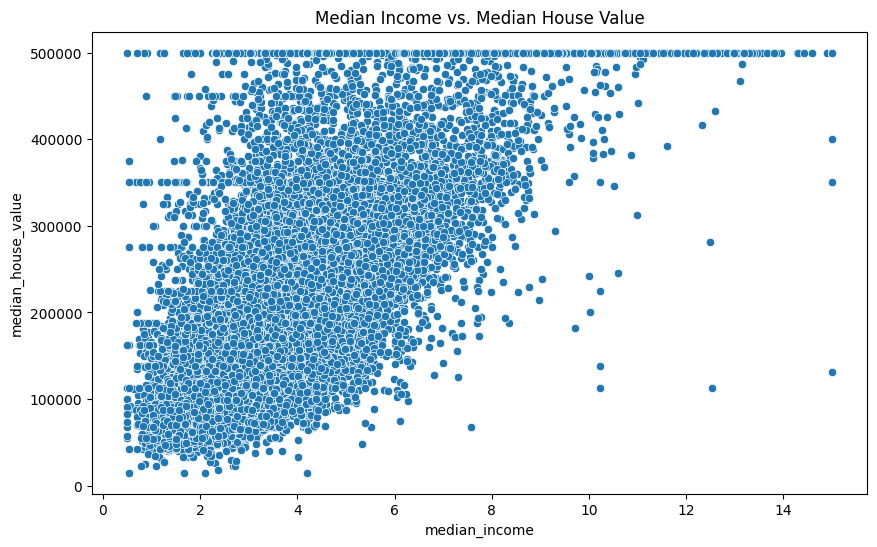

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot for median income vs. median house value
plt.figure(figsize=(10, 6))
sns.scatterplot(data=housing_data, x='median_income', y='median_house_value')
plt.title('Median Income vs. Median House Value')
plt.show()

## 5. Model Building
In this section, we will define our features and target variable, then split the dataset into training and testing sets.

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Define features and target
X = housing_data[['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']]
y = housing_data['median_house_value']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 2484035195.2572675
R^2 Score: 0.8104381733867658


## 6. Feature Importance Analysis
In this section, we will analyze which features are most influential in predicting the median house value.

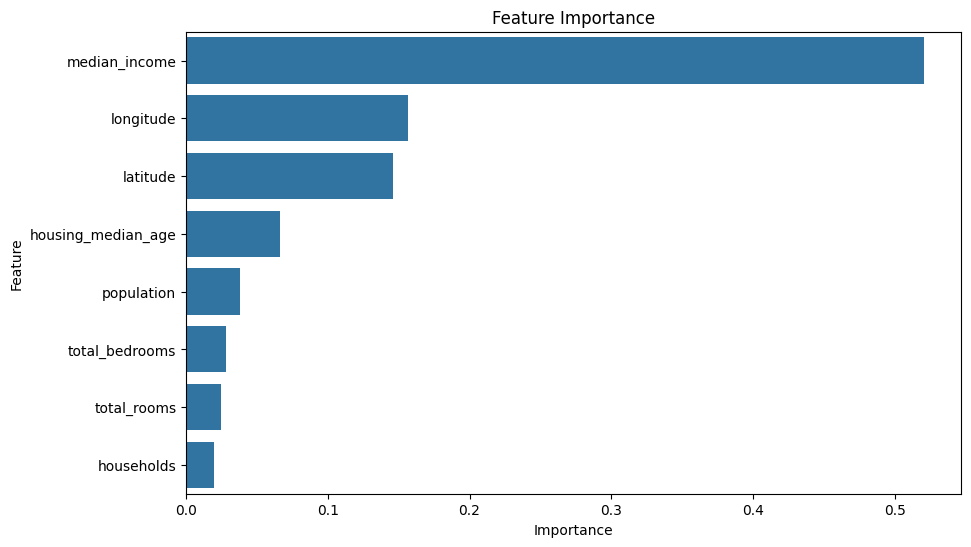

In [12]:
# Feature importance
importance = model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plotting feature importance
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance_df, x='Importance', y='Feature')
plt.title('Feature Importance')
plt.show()

## 7 . Hyperparameter Tuning
Optimize the model's performance using GridSearchCV or RandomizedSearchCV to enhance the R² score.

In [14]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_features': ['sqrt', 'log2'],  # Removed 'auto'
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate the best model
y_pred_best = best_model.predict(X_test)
mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

print(f'Best Mean Squared Error: {mse_best}')
print(f'Best R^2 Score: {r2_best}')

Fitting 3 folds for each of 48 candidates, totalling 144 fits
Best Mean Squared Error: 2500382689.910141
Best R^2 Score: 0.8091906625009034


## 8. Error Analysis
Visualize the differences between actual and predicted values to identify patterns in prediction errors.

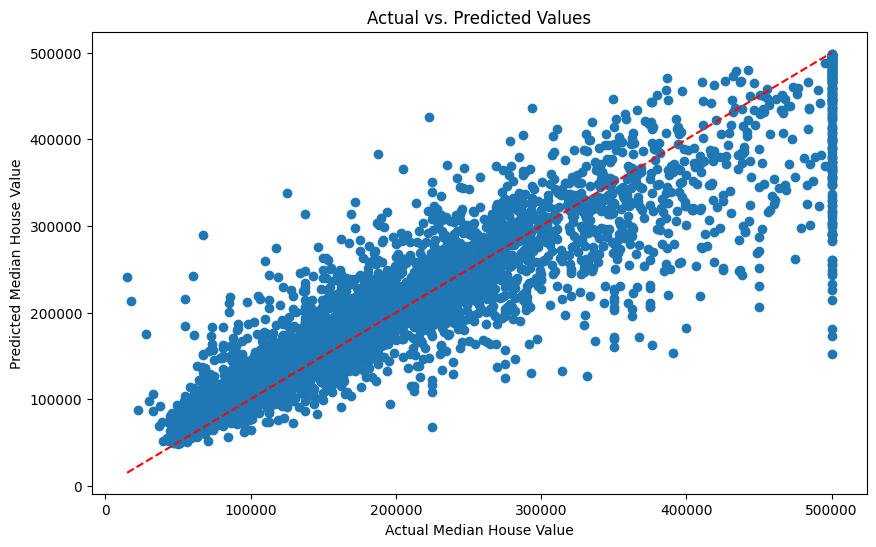

In [15]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_best)
plt.xlabel('Actual Median House Value')
plt.ylabel('Predicted Median House Value')
plt.title('Actual vs. Predicted Values')
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--', color='red')  # 45-degree line
plt.show()

## 9. Model Evaluation Metrics
Alongside Mean Squared Error and R² Score, include metrics like Mean Absolute Error (MAE) for a clearer assessment of model performance.

In [16]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred_best)
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 32847.574829755096


## 10. Data Visualization Enhancements
Histograms of Key Variables: Visualize distributions of key variables such as median_house_value and median_income.
Geographical Visualization: If you have access to libraries like Folium, consider plotting house values on a map to visualize geographical trends.

## 11. Summary of Findings
1. Feature Importance: Key predictors of median house value include median_income, total_rooms, and housing_median_age, with median_income showing the strongest correlation.

2. Model Performance: The Random Forest Regressor achieved an R² score of about 0.81 and a mean squared error of approximately 2.50 billion after hyperparameter tuning, indicating effective predictive capability.

3. Observed Trends: A positive relationship exists between income and house values, particularly in coastal areas, reinforcing the influence of economic factors on real estate.

4. Data Quality: Missing values in total_bedrooms were addressed through imputation, emphasizing the importance of data cleaning..

## 12. Conclusion
Overall, the analysis highlights the significant role of income in housing prices and demonstrates the Random Forest model's strong performance, with room for further enhancement.

## 13. Future Directions
1.  Additional Data Sources: Integrate economic indicators, such as unemployment rates and population growth, to enhance model accuracy and insights.

2. Predicting Future Trends: Use time-series analysis to forecast housing prices based on historical trends, allowing for better market predictions.

3. Geospatial Analysis: Incorporate geographic data to identify regional trends and variations in housing prices more effectively.

4. Advanced Modeling Techniques: Explore other machine learning models, like Gradient Boosting or Neural Networks, for potentially improved performance.

5. User Interface Development: Create a user-friendly dashboard for stakeholders to interact with the data and visualize trends dynamically.